In [22]:
using Images
using PyPlot
using Statistics
using DelimitedFiles
using LsqFit
include("utils.jl");

In [23]:
#folder with diffusion traces processed using kymo.ipynb
#tab-delimited text files with time (s), position (um) and intensity columns
datapath = "example/traced/"

windowlength = 60;         # desired length of sub-traces (seconds)
fluo_price = 1000;          # intensity of a single fluorophore (a.u.) - should be determined separately
size_threshold = Inf;       # cutoff of the initial intensity (do not include spots with higher oligomerization)
samplename = "example";

In [24]:
#calculating all initial intensities, without filtering
#splitting diffusion traces that fit our conditions for brightness and length into 
#pieces of 'windowlength' and appending them in a matrix
sqdisp, fluo_count, output = sort_positions(datapath, size_threshold, windowlength);

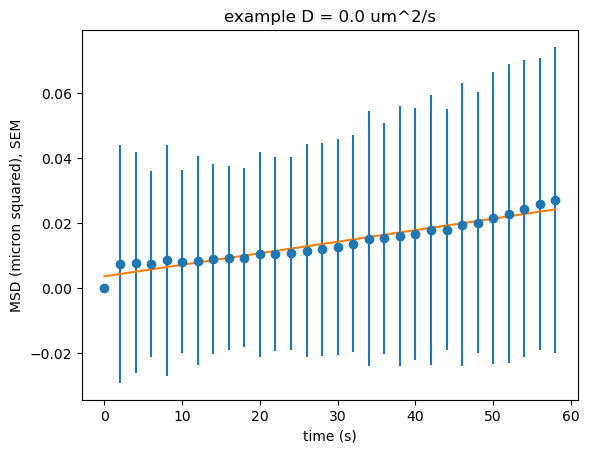

In [25]:
(slope,intercept) = linfit_o(output[:,1],output[:,2],output[end,2]/output[end,1],0);
xplot = zeros(21);
yplot = zeros(21);
for ii in 1:21
    xplot[ii] = (ii-1)*(output[end,1]/20);
    yplot[ii] = slope*xplot[ii] + intercept;
end

linplot = figure();
subplot(111, xlabel="time (s)", ylabel="MSD (micron squared), SEM");
pl1 = errorbar(output[:,1],output[:,2],yerr=output[:,4],fmt="o");
pl2 = plot(xplot,yplot);
PyPlot.title(string(samplename, " D = ", round(slope; digits=3), " um^2/s"));

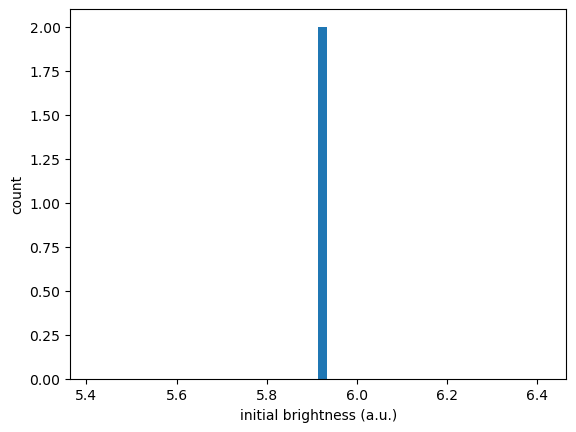

In [26]:
brightnessplot = figure();
subplot(111, xlabel="initial brightness (a.u.)", ylabel="count");
h = plt.hist(fluo_count, 50);

In [27]:
savepath = string(datapath, samplename, "_process_diffusion_below_", size_threshold, "_monomers/");
let savepath = savepath
    if isdir(savepath) == false
        mkdir(savepath)
    end 
end

In [28]:
save_output = string(savepath, "t_meanMSD_SD_SEM_N.txt");
open(save_output, "w") do io;
    writedlm(io, output);
end
save_D = string(savepath, "D.txt");
open(save_D, "w") do io;
    writedlm(io, slope);
end
save_fluo = string(savepath, "initial_complex_size_unfiltered.txt");
open(save_fluo, "w") do io;
    writedlm(io, fluo_count);
end